In [55]:
import pandas as pd
from DecisionTreeClassifier import DecisionTree
df = pd.read_csv("data/D2.txt", sep=" ", header=None)
df.columns = ['x1', 'x2', 'Outcome']
cols = df.columns   
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [56]:
cols = df.columns.drop("Outcome")
cols

Index(['x1', 'x2'], dtype='object')

In [57]:
model = DecisionTree(df, ['x1', 'x2'])
model()

x1 Attribute, Threshold : 0.454801 IG: 0.10870229757359645
x2 Attribute, Threshold : 0.49371 IG: 0.09056355282237771
x1 Attribute, Threshold : 0.645326 IG: 0.012999640076866381
x2 Attribute, Threshold : 0.224236 IG: 0.0875107332975339
x1 Attribute, Threshold : 0.708127 IG: 0.0296998778636359
x2 Attribute, Threshold : 0.506048 IG: 0.037745204614714756
x1 Attribute, Threshold : 0.533076 IG: 0.1583224564708912
x2 Attribute, Threshold : 0.505084 IG: 0.00590013323550298
x1 Attribute, Threshold : 0.708127 IG: 0.0840598718848928
x2 Attribute, Threshold : 0.424906 IG: 0.030776176065937022
x1 Attribute, Threshold : 0.700198 IG: 0.027902339171214152
x2 Attribute, Threshold : 0.32625 IG: 0.23521545204051492
x1 Attribute, Threshold : 0.622049 IG: 0.10181544102038498
x2 Attribute, Threshold : 0.4251 IG: 0.12108607825986156
x1 Attribute, Threshold : 0.646007 IG: 0.22068886853450542
x2 Attribute, Threshold : 0.421367 IG: 0.03496450078850233
x1 Attribute, Threshold : 0.595471 IG: 0.1812845363407426
x2

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


In [51]:
import pandas as pd
from DecisionTreeClassifier import DecisionTree
df = pd.read_csv("data/Dbig.txt", sep=" ", header=None)
df.columns = ['x1', 'x2', 'Outcome']
cols = df.columns   
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [48]:
df

,x1,x2,Outcome
0,-1.499372,0.976384,1
1,-1.499224,-0.517983,1
2,-1.498880,-1.271624,1
3,-1.498383,1.456647,1
4,-1.498293,-1.290862,1
...,...,...,...
9995,1.498964,0.036682,1
9996,1.499012,1.444314,1
9997,1.499284,0.447541,1
9998,1.499313,1.092598,1


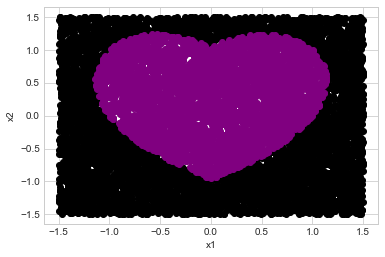

In [49]:
x_black = np.array(df[df['Outcome']==1]['x1'])
y_black = np.array(df[df['Outcome']==1]['x2'])
x_red = np.array(df[df['Outcome']==0]['x1'])
y_red = np.array(df[df['Outcome']==0]['x2'])

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_black, y_black, 'o', color='black')
plt.plot(x_red, y_red, 'o', color='purple')


In [52]:
dbig_train = df.sample(n=8192)
df_test = df.loc[~df.index.isin(dbig_train.index)]
d32 = dbig_train[:32]
d128 = dbig_train[:128]
d512 = dbig_train[:512]
d2048 = dbig_train[:2048]
d8192 = dbig_train[:8192]

In [53]:
dbig_train

,x1,x2,Outcome
5717,0.249496,1.359764,1
3550,-0.412132,-0.748690,1
606,-1.313200,0.068472,1
4121,-0.236784,0.276030,0
8624,1.081459,-0.412491,1
...,...,...,...
206,-1.436889,0.322118,1
3464,-0.436899,0.807595,0
2995,-0.580807,1.231492,0
8015,0.909402,-1.337951,1


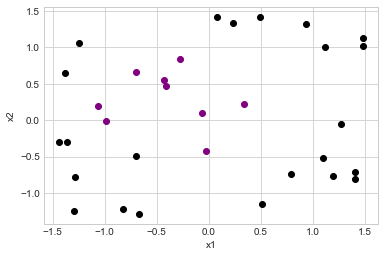

In [56]:
x_black = np.array(d32[d32['Outcome']==1]['x1'])
y_black = np.array(d32[d32['Outcome']==1]['x2'])
x_red = np.array(d32[d32['Outcome']==0]['x1'])
y_red = np.array(d32[d32['Outcome']==0]['x2'])

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_black, y_black, 'o', color='black')
plt.plot(x_red, y_red, 'o', color='purple')


In [70]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")


In [86]:
x = d8192.drop(columns='Outcome')
y = d8192['Outcome']
model = clf.fit(x, y)
clf.tree_.node_count

233

In [87]:
x_test = df_test.drop(columns='Outcome')
y_test = df_test['Outcome']
model.score(x_test, y_test)
# D32 0.8091814159292036 9 nodes
# D128 0.9369469026548672    19 nodes
# D512  0.963495575221239 33 nodes
# D2048 0.9767699115044248 109 nodes
# D8192 0.9905973451327433 233 nodes

0.9905973451327433

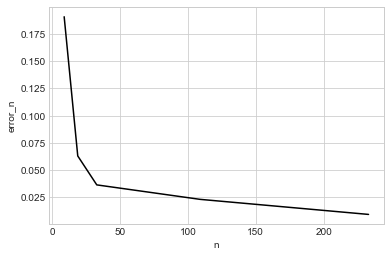

In [88]:
n = [9, 19, 33, 109, 233]
err = [1-0.8091814159292036, 1-0.9369469026548672, 1-0.963495575221239, 1-0.9767699115044248, 1-0.9905973451327433]
plt.xlabel('n')
plt.ylabel('error_n')

plt.plot(n, err, '', color='black')

In [54]:
model = DecisionTree(d32, ['x1', 'x2'])
model()
model.predict(test_data=df_test)

x1 Attribute, Threshold : -0.908328 IG: 0.07166438523386509
x2 Attribute, Threshold : -0.589047 IG: 0.08504508994935256
x1 Attribute, Threshold : 1.054293 IG: 0.09130084769693897
x2 Attribute, Threshold : 1.359764 IG: 0.06462575723076325
x1 Attribute, Threshold : -0.908328 IG: 0.18887565999998318
x2 Attribute, Threshold : 1.359764 IG: 0.12832552168510553
x1 Attribute, Threshold : 0.438179 IG: 0.032597134829355556
x2 Attribute, Threshold : 1.359764 IG: 0.22834633225754192
x1 Attribute, Threshold : -0.516233 IG: 0.15267663750274843
x2 Attribute, Threshold : -0.295346 IG: 0.15267663750274843
x1 -0.789914
Yeah, remainder is zero
x1 -0.789914
Yeah, remainder is zero
x1 Attribute, Threshold : -0.789914 IG: 0.8899750004807708
x2 0.779292
Yeah, remainder is zero
x2 0.779292
Yeah, remainder is zero
x2 Attribute, Threshold : 0.779292 IG: 0.8899750004807708

 ****************************** 

Level  0 

{'Headline': 'x2 >= -0.589047;  Gain = 0.08504508994935256',
 'Level': 0,
 'Predecessor': 32,
 

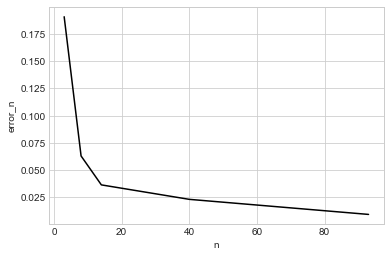

In [101]:
n = [3, 8, 14, 40, 93]
error = [0.2099, 0.06999995, 0.04000000, 0.020, 0.010]

plt.xlabel('n')
plt.ylabel('error_n')

plt.plot(n, err, '', color='black')

In [29]:
import numpy as np
x = (10 - 0) * np.random.random_sample((100,))

In [30]:

x

array([1.0852237 , 0.04411601, 9.40918797, 0.59810255, 8.21700782,
       6.44394989, 0.11070319, 1.36883184, 5.86701729, 0.12300785,
       7.69244964, 6.54376591, 1.10160003, 6.4915247 , 8.13180804,
       5.78803141, 0.42476279, 8.16617098, 0.27516696, 6.31676595,
       6.62912267, 3.7398856 , 8.84522324, 7.38016358, 0.4111116 ,
       4.97336364, 1.27216908, 4.19397222, 2.65544187, 2.98012608,
       6.84461668, 7.00324549, 9.18972635, 8.41653647, 6.03688893,
       3.80293517, 7.41344992, 9.91790916, 7.67869421, 7.32455003,
       0.10012846, 6.58183733, 1.38058523, 1.56479712, 7.10762097,
       3.52063163, 6.09644318, 4.77881521, 7.80870265, 8.68558656,
       1.48643288, 1.15626374, 6.79968189, 5.82615261, 3.54094411,
       4.46315256, 4.08608062, 5.90107914, 1.92028203, 0.68692386,
       3.00163285, 7.37492636, 1.19468524, 3.33953038, 9.96037875,
       6.61648006, 4.65057216, 5.78922605, 0.55364039, 0.33188429,
       1.62969419, 4.11053028, 2.9459911 , 7.7191664 , 2.66647

In [31]:
y = np.sin(x)
y

array([ 0.88440784,  0.0441017 ,  0.01558936,  0.56307542,  0.93482649,
        0.16007298,  0.11047721,  0.9796744 , -0.40425853,  0.12269788,
        0.98698205,  0.2576416 ,  0.89193199,  0.20683549,  0.96165385,
       -0.47516707,  0.41210466,  0.95166341,  0.27170762,  0.03357434,
        0.33907865, -0.56323276,  0.54765142,  0.88983265,  0.39962856,
       -0.96613895,  0.95574126, -0.86860477,  0.46722612,  0.16076587,
        0.53239839,  0.65942991,  0.23289317,  0.84589525, -0.24381378,
       -0.61417688,  0.90452506, -0.47338633,  0.98467645,  0.86309427,
        0.09996123,  0.29423216,  0.98196435,  0.999982  ,  0.73416473,
       -0.37002783, -0.18565865, -0.99779459,  0.99897508,  0.67369057,
        0.99644351,  0.91530468,  0.49383676, -0.44128729, -0.38882091,
       -0.96910105, -0.81019691, -0.37287557,  0.93954894,  0.63416171,
        0.13950332,  0.88743078,  0.93010009, -0.19664775, -0.51035779,
        0.32715824, -0.99808995, -0.47411557,  0.52578728,  0.32

In [33]:
from scipy.interpolate import lagrange
poly = lagrange(x, y)
poly.coefficients


array([-1.67239212e-44,  9.85493532e-42, -2.37773262e-39,  3.02379745e-37,
       -3.23740047e-35,  2.54221523e-33, -1.02535610e-32,  1.28717386e-29,
       -5.65826531e-28,  1.88635798e-26,  2.76295506e-25,  1.38536577e-23,
        5.91238264e-23,  2.61940125e-20,  3.12496727e-19, -3.98452374e-18,
        3.39937131e-16, -6.56890991e-17,  1.18509914e-13, -2.22402117e-12,
       -1.10367424e-11,  4.81897345e-10, -3.56679608e-09, -1.53161914e-08,
       -3.00369420e-06,  3.96378402e-06,  3.23893161e-04, -3.98475604e-04,
       -4.30489988e-02,  3.46192223e-01, -3.24481946e+00,  2.64595094e+01,
       -5.37846997e+02,  2.49459236e+03, -4.07233208e+04,  8.38963711e+04,
       -5.18023977e+05, -1.01757027e+07,  9.51495881e+07, -3.49807591e+08,
        1.12765171e+09, -9.97759526e+09,  9.35594360e+10, -4.36233630e+11,
        2.06905043e+12, -1.23557716e+13,  4.48904951e+13, -1.88816402e+14,
        5.60556497e+14, -1.07888465e+15,  6.43746279e+15, -7.21861502e+15,
       -3.59334853e+16, -

In [109]:
x_test = (10 - 0) * np.random.random_sample((10,))
y_test = np.sin(x_test)

In [34]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(poly(x), y)

1.2426298372857457e+68

In [36]:
x_test = (10 - 0) * np.random.random_sample((10,))
y_test = np.sin(x_test)
mean_absolute_error(poly(x_test), y_test)

3.5259340923635824e+68

In [44]:
noise = np.random.normal(0, 1, 100)
x = noise+x
poly = lagrange(x, y)
mean_absolute_error(poly(x), y)


2.285069442486491e+70

In [45]:
x_test = (10 - 0) * np.random.random_sample((100,)) + np.random.normal(0, 1, 100)
y_test = np.sin(x_test)
mean_absolute_error(poly(x_test), y_test)

5.084587742799037e+67

In [46]:
noise = np.random.normal(0, 10, 100)
x = noise+x
poly = lagrange(x, y)
mean_absolute_error(poly(x), y)


9.865928902888427e+65

In [47]:
x_test = (10 - 0) * np.random.random_sample((100,)) + np.random.normal(0, 10, 100)
y_test = np.sin(x_test)
mean_absolute_error(poly(x_test), y_test)

3.563889962553354e+65

In [48]:
noise = np.random.normal(0, 50, 100)
x = noise+x
poly = lagrange(x, y)
mean_absolute_error(poly(x), y)

9.680045818333048e+55

In [49]:
x_test = (10 - 0) * np.random.random_sample((100,)) + np.random.normal(0, 50, 100)
y_test = np.sin(x_test)
mean_absolute_error(poly(x_test), y_test)

5.79185303030396e+71

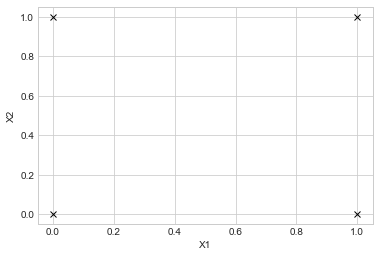

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]

plt.xlabel('X1')
plt.ylabel('X2')

plt.plot(x1, x2, 'x', color='black')